# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

x =np.shape(xy_data)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

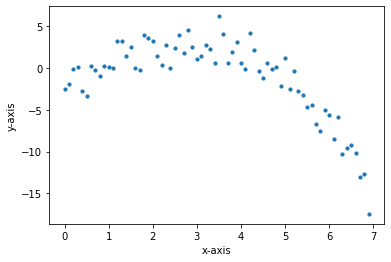

In [8]:
import matplotlib.pyplot as plt
# Your code for scatterplot here

data_x = xy_data[:,0]
data_y = xy_data[:,1]

plt.scatter(data_x, data_y, s=10)   # s can be used to adjust the size of the dots
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [79]:
def polyreg(data_matrix, k):
    # Your code here
    # The function should return the the coefficient vector 
    # beta, the fit, and the vector of residuals

    data_x = data_matrix[:,0]
    data_y = data_matrix[:,1]

    all_ones = np.ones(np.shape(data_x))

    N = len(data_matrix)

    if k == 0: # Needed is k is zero
        beta_poly = np.mean(data_y)
        fit_poly = beta_poly*all_ones
        resid = data_y - fit_poly

    else:
        if k >= N: # condition given from above
            k = N-1
        else:
            k = k

        x2 = all_ones
        for i in range(k): # working it out for every vaule of k
            x2 = np.vstack((x2, data_x ** (i+1))) #puts these values in rows

        x_trans = np.transpose(x2) # transpose to columns
        beta_poly = np.linalg.lstsq(x_trans, data_y, rcond=None)[0]
        fit_poly = x_trans.dot(beta_poly)
        resid = data_y - fit_poly

    return beta_poly, fit_poly, resid

Use the tests below to check the outputs of the function you have written:

In [80]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

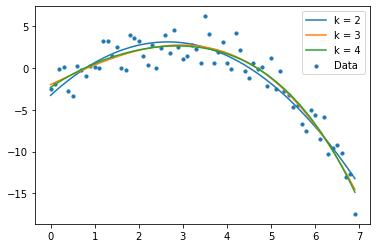

SSE_2 =  13.12


In [89]:
#Your code here
[beta_2, fit_2, resid_2] = polyreg(xy_data, 2)
[beta_3, fit_3, resid_3] = polyreg(xy_data, 3)
[beta_4, fit_4, resid_4] = polyreg(xy_data, 4)

plt.scatter(data_x, data_y, s=10, label = 'Data')
plt.plot(data_x, fit_2, label = 'k = 2')
plt.plot(data_x, fit_3, label = 'k = 3')
plt.plot(data_x, fit_4, label = 'k = 4')
plt.legend()
plt.show()

SSE_2 = np.linalg.norm(data_y - fit_2)
SSE_3 = np.linalg.norm(data_y - fit_3)
SSE_4 = np.linalg.norm(data_y - fit_4)

print('SSE_2 = ', np.round_(SSE_2, 2))


 #### State which model you choose and briefly justify your choice.
 
 
 < fill in your answer in this cell.>
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

In [ ]:
#Your code here

